In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt



In [2]:
#Adding the dataset

data= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
#The head () function is used to get the first n rows.
#It is helpful for quickly testing if your object has the right type of data in it.
#For negative values of n,the head () function returns all rows except the last n rows, equivalent to df [:-n].

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> **Data and Dataset**

Now split data into dev and training set
Risk-*Overfitting*
It may happen that your model maybe exactly figuring out the exact pridiction for your *"*training data"* *
but not generalize data where you actually want to
that's *Dev/Cross-Validation Data *where you don't want to generalize-test performance data


In [4]:
#Now split data into dev and training set
data=np.array(data)
m,n = data.shape
np.random.shuffle(data)


#T for transpose so that each column is eg rather than each row for convinence
data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255.

data_train= data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255.
_,m_train=X_train.shape


> **Starting with Neural Network**

In [5]:
#Initializing parameters
def init_params():
    #784 pixels to 10 classes
    W1=np.random.randn(10,784)- 0.5  #this generates diff values from 0 to 1 and we sub 0.5 toget b/w -0.5 to 0.5
    b1=np.random.randn(10,1)- 0.5
    W2=np.random.randn(10,10)- 0.5
    b2=np.random.randn(10,1)- 0.5
    return W1,b1,W2,b2
    
    

In [6]:
    #Forward propagation
    def ReLU(Z):   #Rectified Linear Unit
        return np.maximum(Z,0)  #returns if >0 return Z else 0
    def SoftMax(Z):
        A= np.exp(Z)/ np.sum(np.exp(Z))
        return A
    #np.sum preserves columns and collapses rows to one row and we want sum of each columns
    
    def forward_prop(W1,b1,W2,b2,X):
        Z1=W1.dot(X)+b1
        A1=ReLU(Z1)
        Z2=W2.dot(A1)+b2
        A2=SoftMax(A1)
        return Z1,A1,Z2,A2
    
    
    
  
 

The function creates an array of zeros called one_hot_Y with dimensions (Y.size, Y.max()+1). The Y.max()+1 term ensures that there is a column in one_hot_Y for each unique value in Y. For example, if Y contains values ranging from 0 to 2, then one_hot_Y will have 3 columns.

The function uses NumPy's arange function to generate an array of integers from 0 to Y.size - 1. This array is used to index into one_hot_Y along the first axis (i.e., the rows).

The function uses the original Y array to index into one_hot_Y along the second axis (i.e., the columns) and set the corresponding elements to 1. This step creates the one-hot encoded version of Y.

The function returns the one-hot encoded Y array.

In [7]:
#Back propagation
#first it creates one new matrix one hot Y with np zeros
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1  #Y.size=row & Y column
    #go to each row and column specified by the label in Y and turn it into 1
    one_hot_Y=one_hot_Y.T
    #right now each row was eg we wanted columns to be an eg
    return one_hot_Y

def deriv_ReLU(Z):
    return Z>0   #consider the graph

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y=one_hot(Y)
    #dZ2=error in second layer
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2
    
    

    


In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [9]:
def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if(i%10==0):
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1,b1,W2,b2

In [10]:
W1,b1,W2,b2= gradient_descent(X_train,Y_train,500,0.10)

Iteration:  0
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  10
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  20
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  30
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  40
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  50
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  60
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  70
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  80
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  90
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  100
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  110
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  120
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Iteration:  130
[0 0 0 ... 0 0 0] [3 0 9 ... 7 0 3]
0.09836585365853659
Ite

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  3


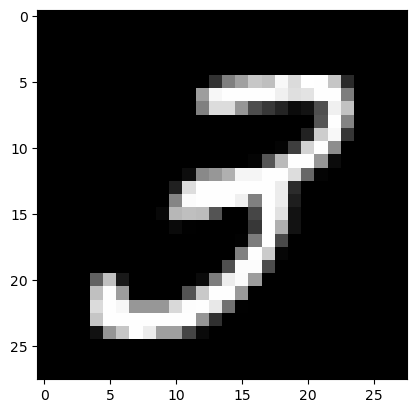

Prediction:  [0]
Label:  0


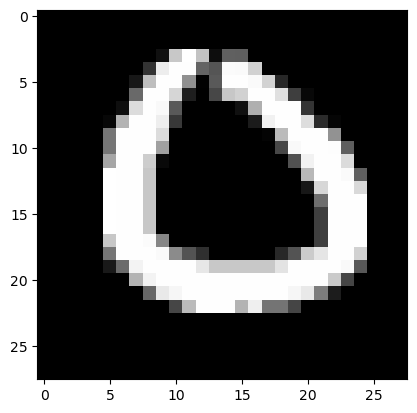

Prediction:  [0]
Label:  9


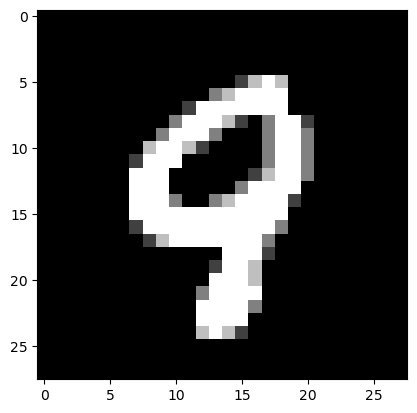

Prediction:  [0]
Label:  3


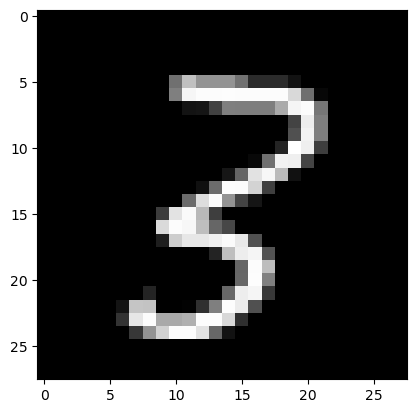

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [13]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

0.099